In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

In [2]:
df = pd.read_csv("../tests/test-data/air_passengers.csv")

In [3]:
m = NeuralProphet(seasonality_mode='multiplicative')
metrics = m.fit(df, freq="MS")

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 292


  0%|          | 0/209 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.94E-02, min: 1.39E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.10E-01
Epoch[292/292]: 100%|█| 292/292 [00:02<00:00, 101.49it/s, SmoothL1Loss=0.000294, MAE=


In [4]:
future = m.make_future_dataframe(df,periods=3)
future.tail()

,ds,y,t,y_scaled
0,1961-01-01,None,1.007123,NaN
1,1961-02-01,None,1.014246,NaN
2,1961-03-01,None,1.020680,NaN


In [5]:
forecast = m.predict(future)
# plt = forecast.plot(x='ds', y=['y', 'yhat1'])
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly
0,1961-01-01,None,451.479645,NaN,507.195007,-0.138185
1,1961-02-01,None,430.277527,NaN,511.725372,-0.199762
2,1961-03-01,None,499.922028,NaN,515.817261,-0.038598


In [ ]:
future = m.make_future_dataframe(df,periods=3, n_historic_predictions=T)
forecast = m.predict(future)
# plt = forecast.plot(x='ds', y=['y', 'yhat1'])
forecast.tail()

In [6]:
forecast = m.predict(df)
# plt = forecast.plot(x='ds', y=['y', 'yhat1'])
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly
139,1960-08-01,606,621.473999,15.473999,484.835846,0.358785
140,1960-09-01,508,516.563843,8.563843,489.366150,0.070576
141,1960-10-01,461,451.555481,-9.444519,493.750275,-0.108261
142,1960-11-01,390,384.324493,-5.675507,498.280579,-0.289023
143,1960-12-01,432,437.829132,5.829132,502.664764,-0.162632


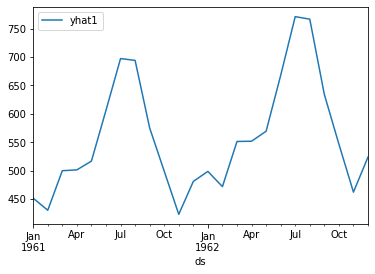

In [7]:
future = m.make_future_dataframe(df, n_historic_predictions=False, periods=24)
forecast = m.predict(future)
plt = forecast.plot(x='ds', y=['y', 'yhat1'])

In [8]:
forecast = m.predict_future(future, n_historic_predictions=False, periods=24)
plt = forecast.plot(x='ds', y=['y', 'yhat1'])

AttributeError: 'NeuralProphet' object has no attribute 'predict_future'